In [1]:
from music21 import stream, meter, converter

In [2]:
def Taktart_Analyse(score):
    """
    Bestimmung der Taktart eines Musikstücks: 
    Dreier-Takt, Zweier-Takt oder gemischten Takt
    """
    if not isinstance(score, (stream.Score, stream.Part)):
        raise ValueError("Input must be a music21 stream.Score or stream.Part")

    time_signatures = score.flatten().getElementsByClass(meter.TimeSignature)

    for ts in time_signatures:
        numerator = ts.numerator
        if numerator % 3 == 0:
            return "Dreier-Takt"   #"Wenn der Zähler durch 3 ist, wird 'Dreier-Takt' rückgegeben."
        elif numerator % 2 == 0:
            return "Zweier-Takt"    #"Wenn der Zähler durch 2 ist, wird 'Dreier-Takt' rückgegeben."

    return "gemischter Takt"  #"Wenn der Zähler weder durch 3 noch durch 2 teilbar ist, wird 'gemischter Takt' ausgegeben."

In [3]:
#test
file_path = r'C:\Users\Administrator\Desktop\Dissonanzanalyse\Sinfonia 2 BWV788.Musicxml'
score = converter.parse(file_path)
result = Taktart_Analyse(score)
print("Taktart:", result)

Taktart: Dreier-Takt


In [4]:
def Grundrhythmus_jederStimme(file_path):
    """
     Erkenne für jeden Takt und jede Stimme die am häufigsten vorkommende Notentyp
     und definiere diese als den grundlegenden rhythmischen Typ für die jeweilige Stimme in diesem Takt. 
     Schließlich füge diesen Typ als Liedtext zu jedem Takt der Partitur hinzu. 
     Diese Programm kann jetzt noch die Partitur bearbeiten, in der jede Stimme eine selbsttändige Notenzeile belegt.

    """
    score = converter.parse(file_path)

    for part in score.parts:
        for measure in part.getElementsByClass(stream.Measure):
            note_durations = {}
            for element in measure.notesAndRests:
                dur_type = element.duration.type
                if dur_type not in note_durations:
                    note_durations[dur_type] = 0
                note_durations[dur_type] += 1

            # für jeden Takt und jede Stimme die am häufigsten vorkommende Notentyp herausfinden
            if note_durations:
                most_common_duration = max(note_durations, key=note_durations.get)
            else:
                most_common_duration = "unknown"

            # diesen Grundrhythmus-Typ als Liedtext zu jeder Stimme in jedem Takt der Partitur hinzufügen
            if len(measure.notesAndRests) > 0:
                first_element = measure.notesAndRests[0]
                first_element.addLyric(most_common_duration)

    return score

In [5]:
#test: Grundrhythmus_jederStimmen

In [6]:
def Stimmeanzahl__jedesTakt(score):
    """
    Beurteilung, wie viele Stimmen jeder Takt hat.
    
    """
    measures_part_count = {}

    for measure_number, measure in enumerate(score.parts[0].getElementsByClass(stream.Measure), start=1):
        part_count = 0

        for part in score.parts:
            if measure_number in [m.measureNumber for m in part.getElementsByClass(stream.Measure)]:
                part_count += 1

        measures_part_count[measure_number] = part_count

    return measures_part_count

In [7]:
#test
result = Stimmeanzahl__jedesTakt(score)
print(result)

{1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2}


In [8]:
def Grundrhythmus_allerStimmen(file_path):
    """
    Im chordify-Zustand den gemeinsamen Grundrhythmus aller Stimmen für jeden Takt bestimmen.
    """
    
    chordified_score = score.chordify()
    is_three_based = Taktart_Analyse(score)

    rhythmic_patterns = []

    for measure in chordified_score.getElementsByClass(stream.Measure):
        note_durations = {}

        # Die Notentypen und deren Anzahl in jedem Takt sammeln
        for element in measure.notesAndRests:
            dur_type = element.duration.type
            if dur_type not in note_durations:
                note_durations[dur_type] = 0
            note_durations[dur_type] += 1

        # Für jeden Takt die am häufigsten vorkommende Notentyp herausfinden
        if note_durations:
            most_common_durations = [k for k, v in note_durations.items() if v == max(note_durations.values())]
            # Bei Dreiertakt und gleich häufigen Noten wird die längere Note gewählt
            if is_three_based and len(most_common_durations) > 1:
                most_common_duration = max(most_common_durations, key=lambda d: duration.convertTypeToQuarterLengths(d))
            else:
                most_common_duration = most_common_durations[0]
        else:
            most_common_duration = "unknown"

        # Rückgabe
        rhythmic_patterns.append((measure.measureNumber, most_common_duration))

    # Ausgabe
    for measure_number, rhythm in rhythmic_patterns:
        print(f"Measure {measure_number}: {rhythm}")

    # Das Ergebnis in die ursprünglichen Partitur hinzufüge
    for measure_number, rhythm in rhythmic_patterns:
        measure = score.parts[1].measure(measure_number)  
        if measure and len(measure.notesAndRests) > 0:
            first_element = measure.notesAndRests[0]
            first_element.addLyric(rhythm)  

    return score

Measure 1: eighth
Measure 2: eighth
Measure 3: eighth
Measure 4: eighth
Measure 5: 16th
Measure 6: 16th
Measure 7: eighth
Measure 8: 16th
Measure 9: 16th
Measure 10: eighth
Measure 11: eighth
Measure 12: eighth
Measure 13: eighth
Measure 14: 16th
Measure 15: 16th
Measure 16: eighth
Measure 17: 16th
Measure 18: 16th
Measure 19: 16th
Measure 20: 16th
Measure 21: 16th
Measure 22: 16th
Measure 23: 16th
Measure 24: 16th
Measure 25: 16th
Measure 26: 16th
Measure 27: eighth
Measure 28: 16th
Measure 29: 16th
Measure 30: eighth
Measure 31: 16th
Measure 32: 16th


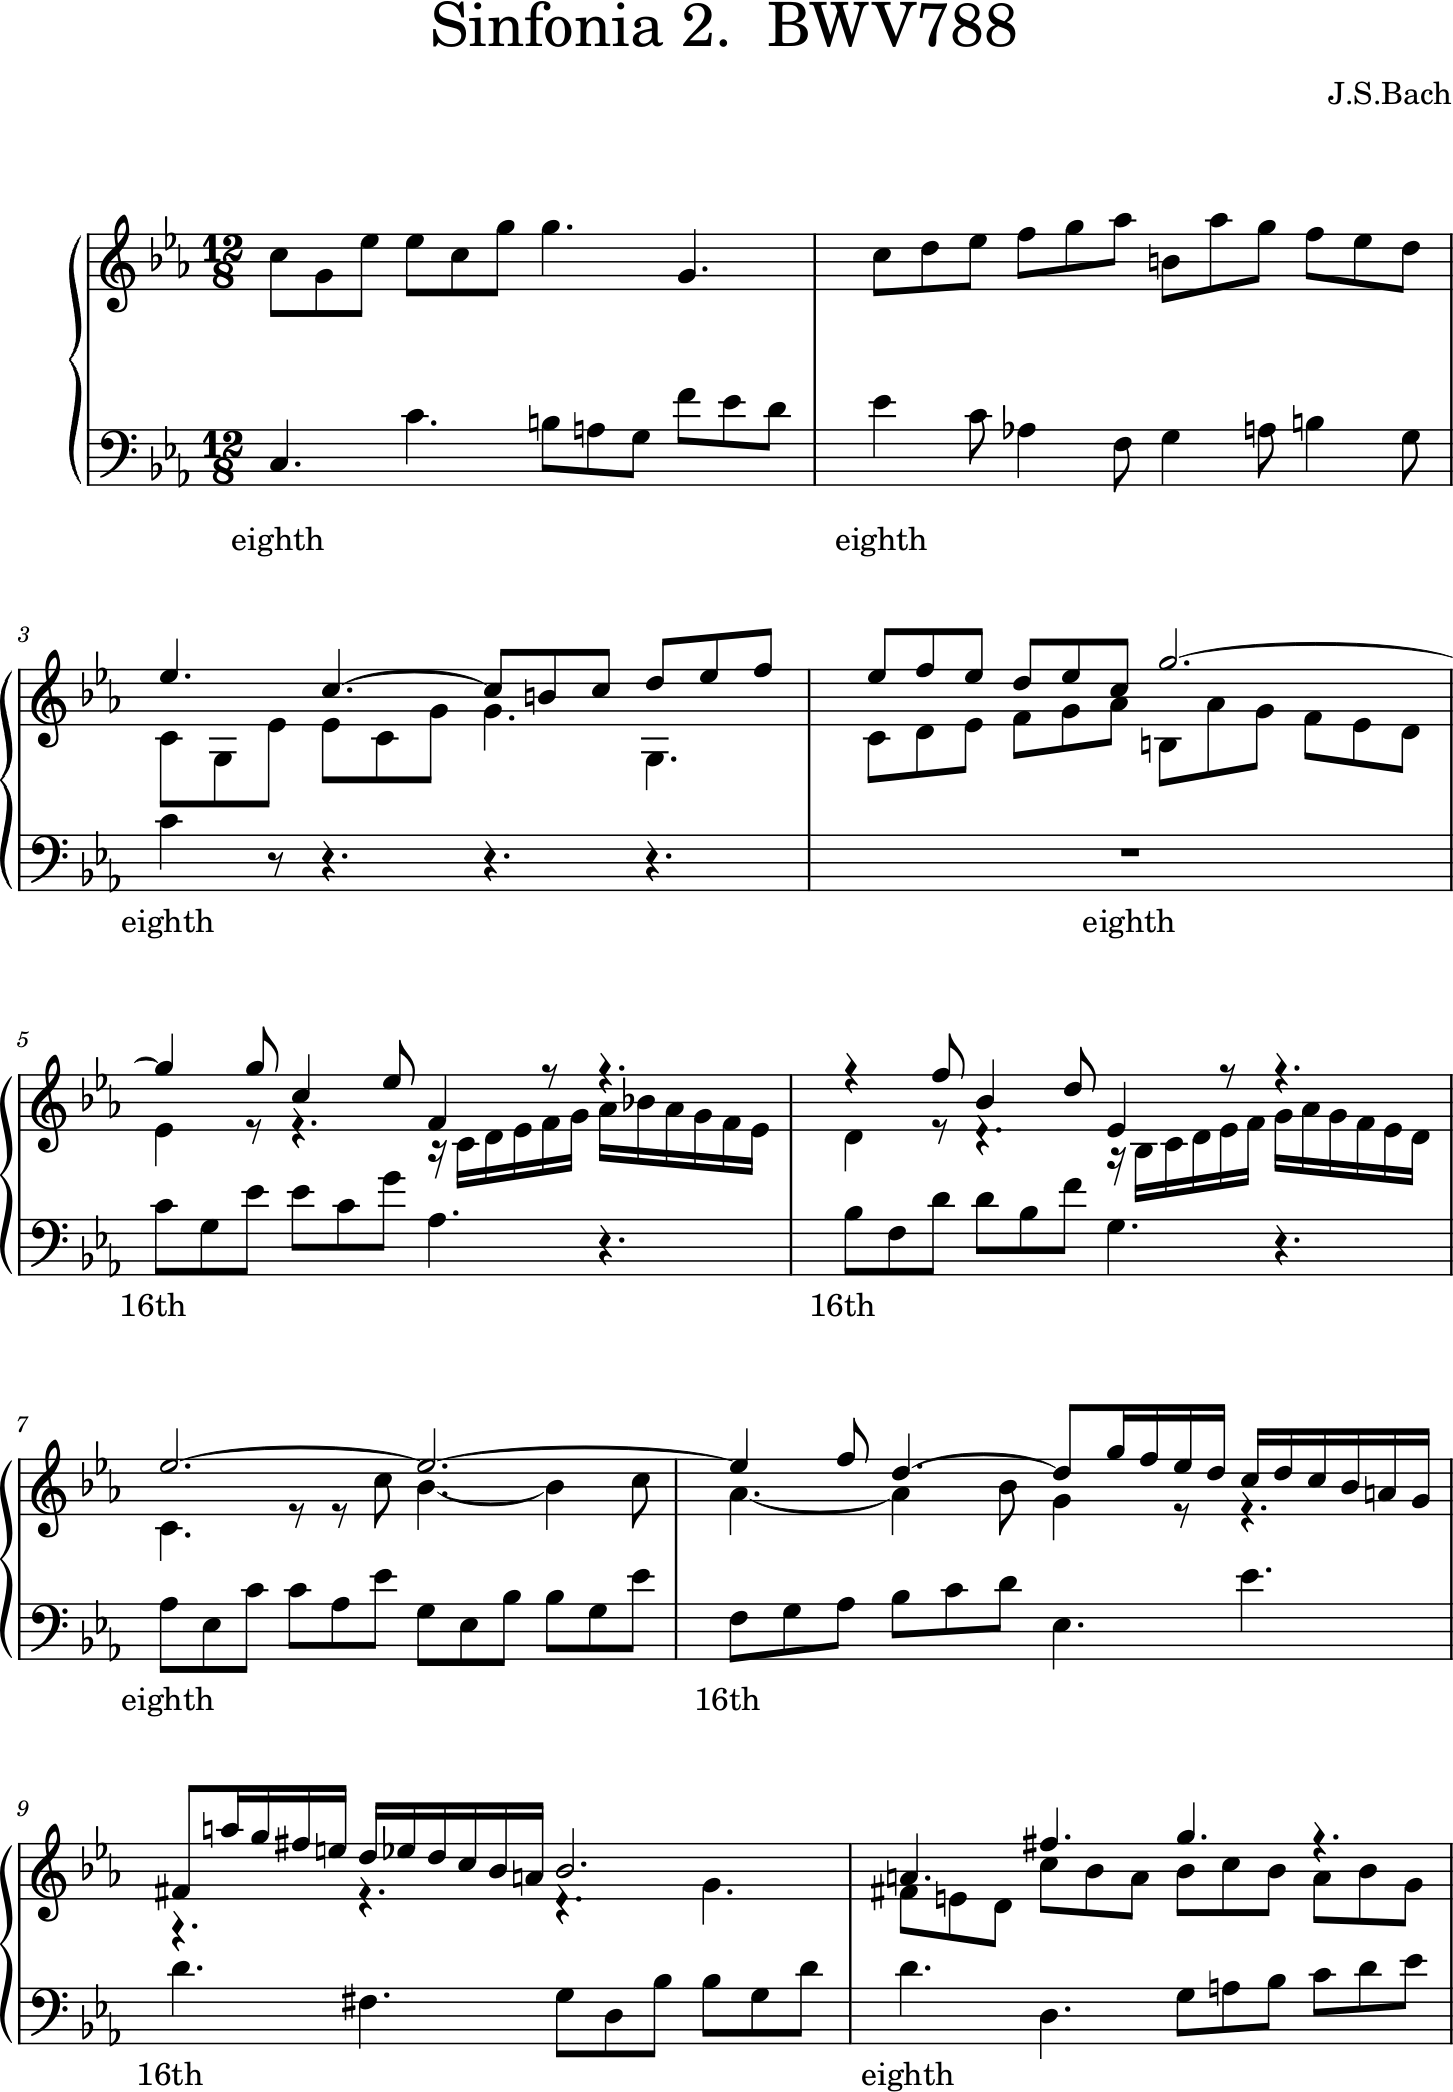

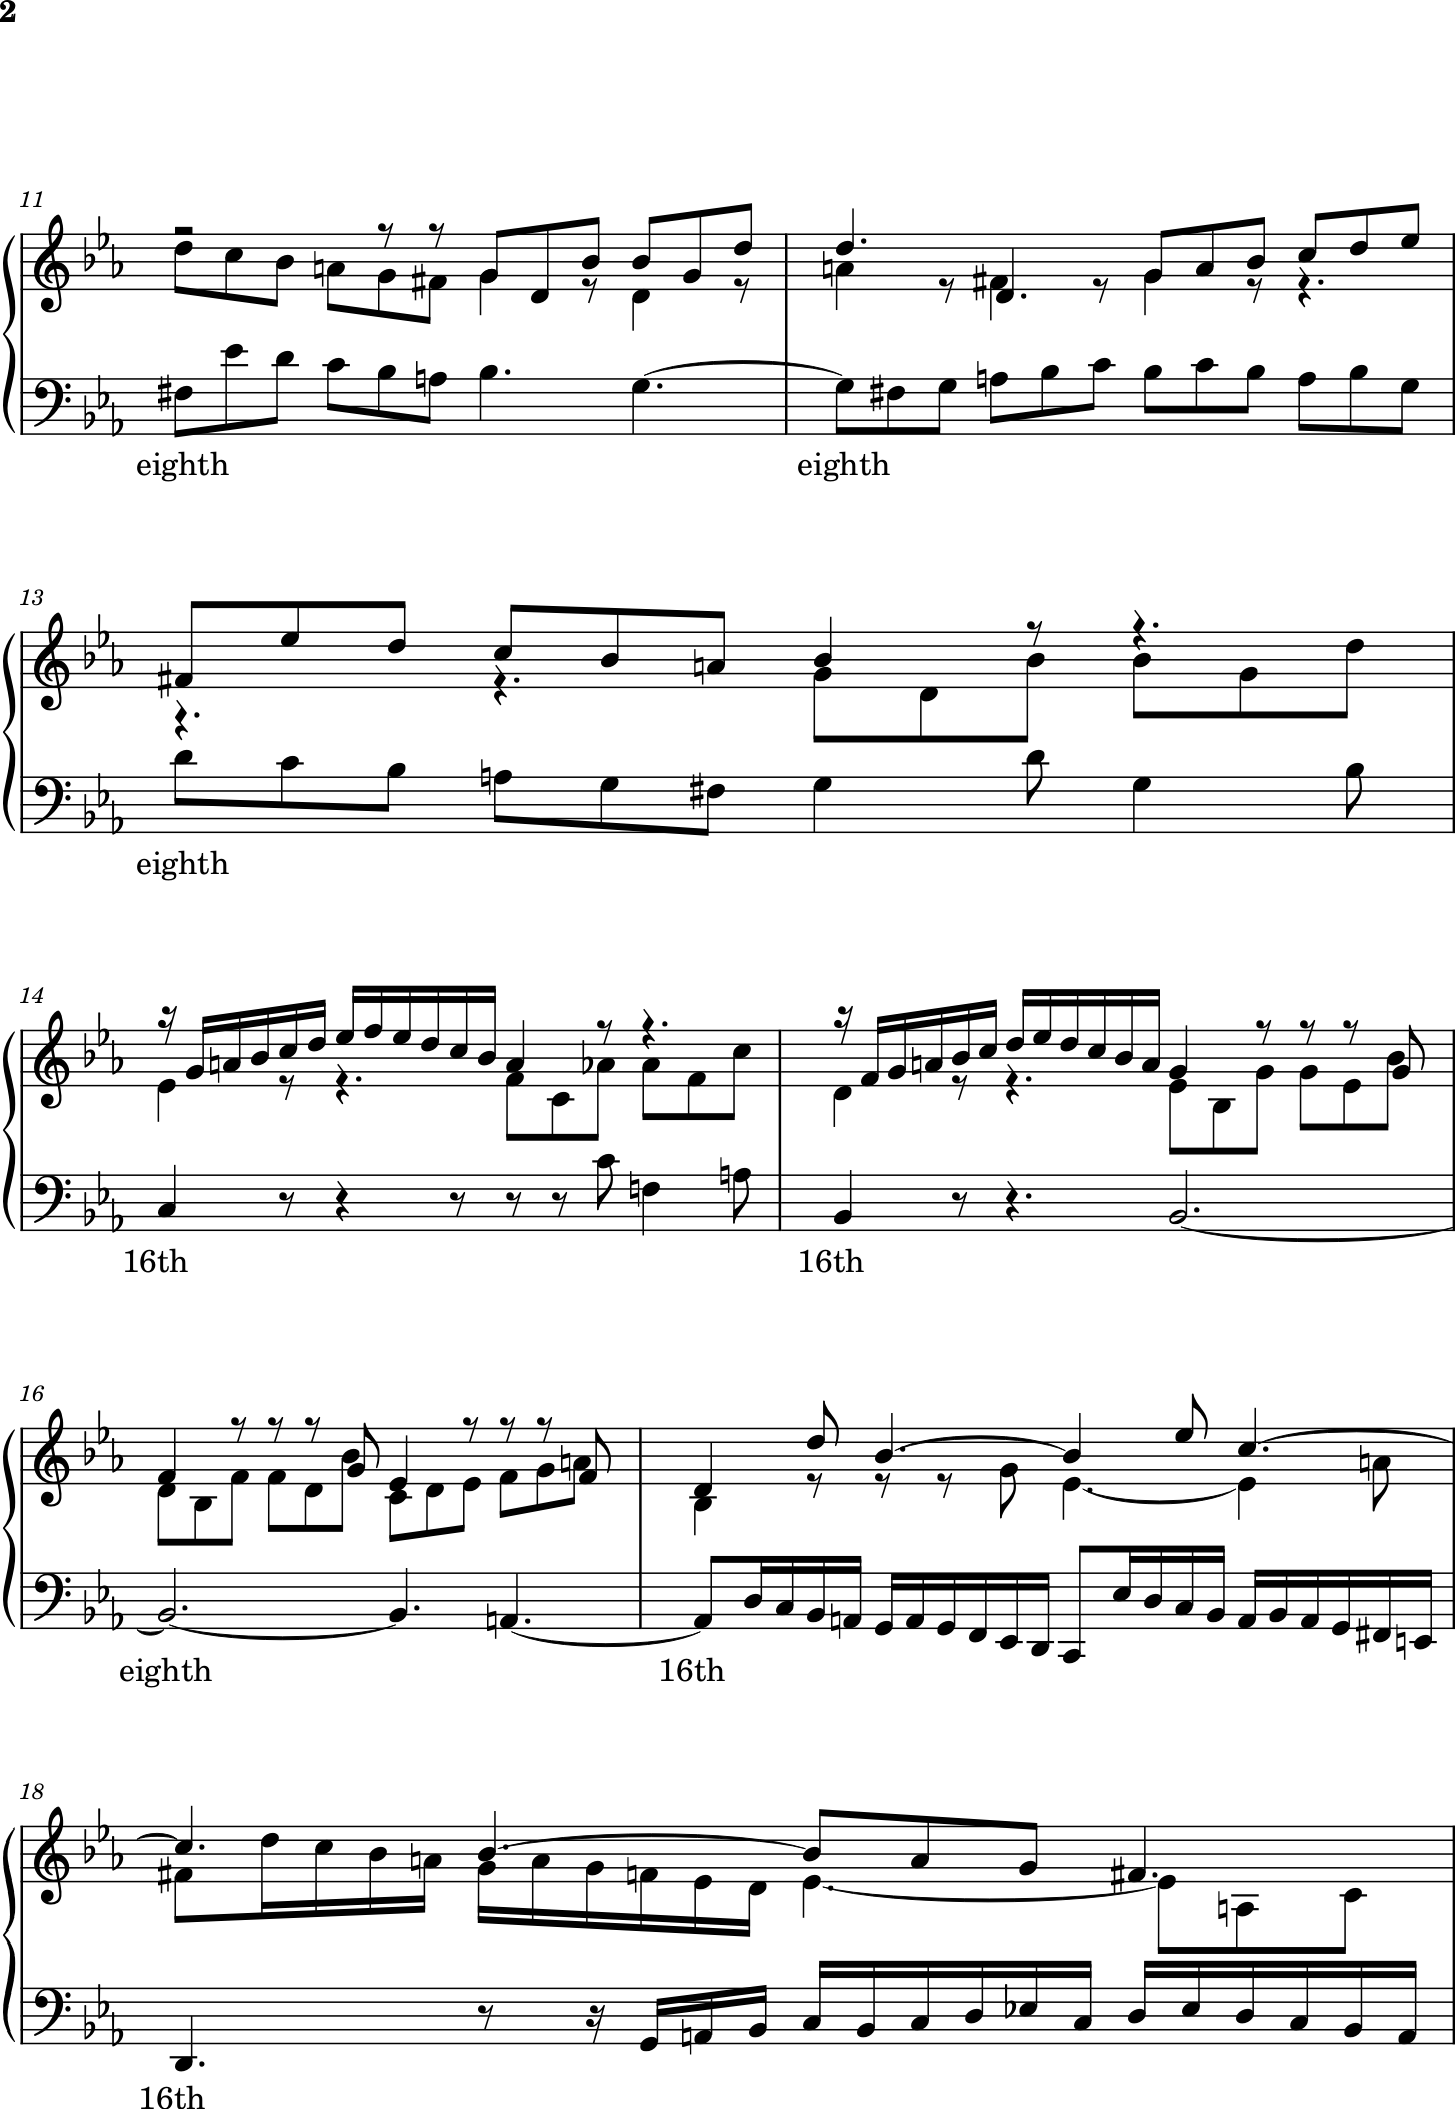

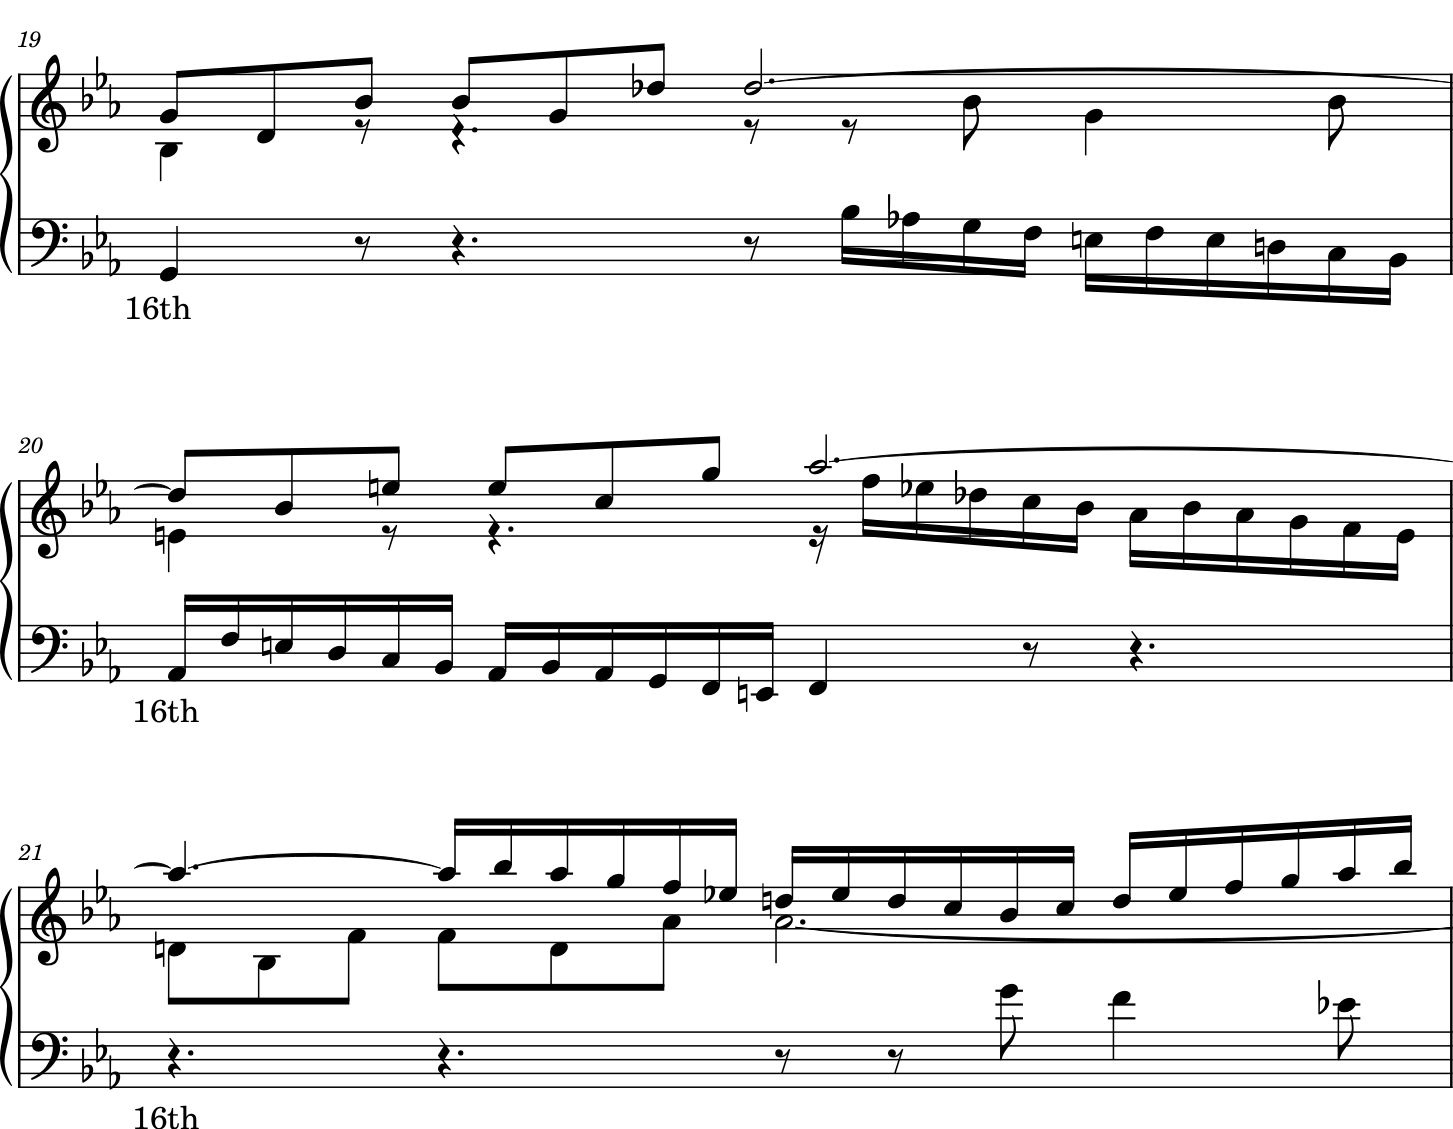

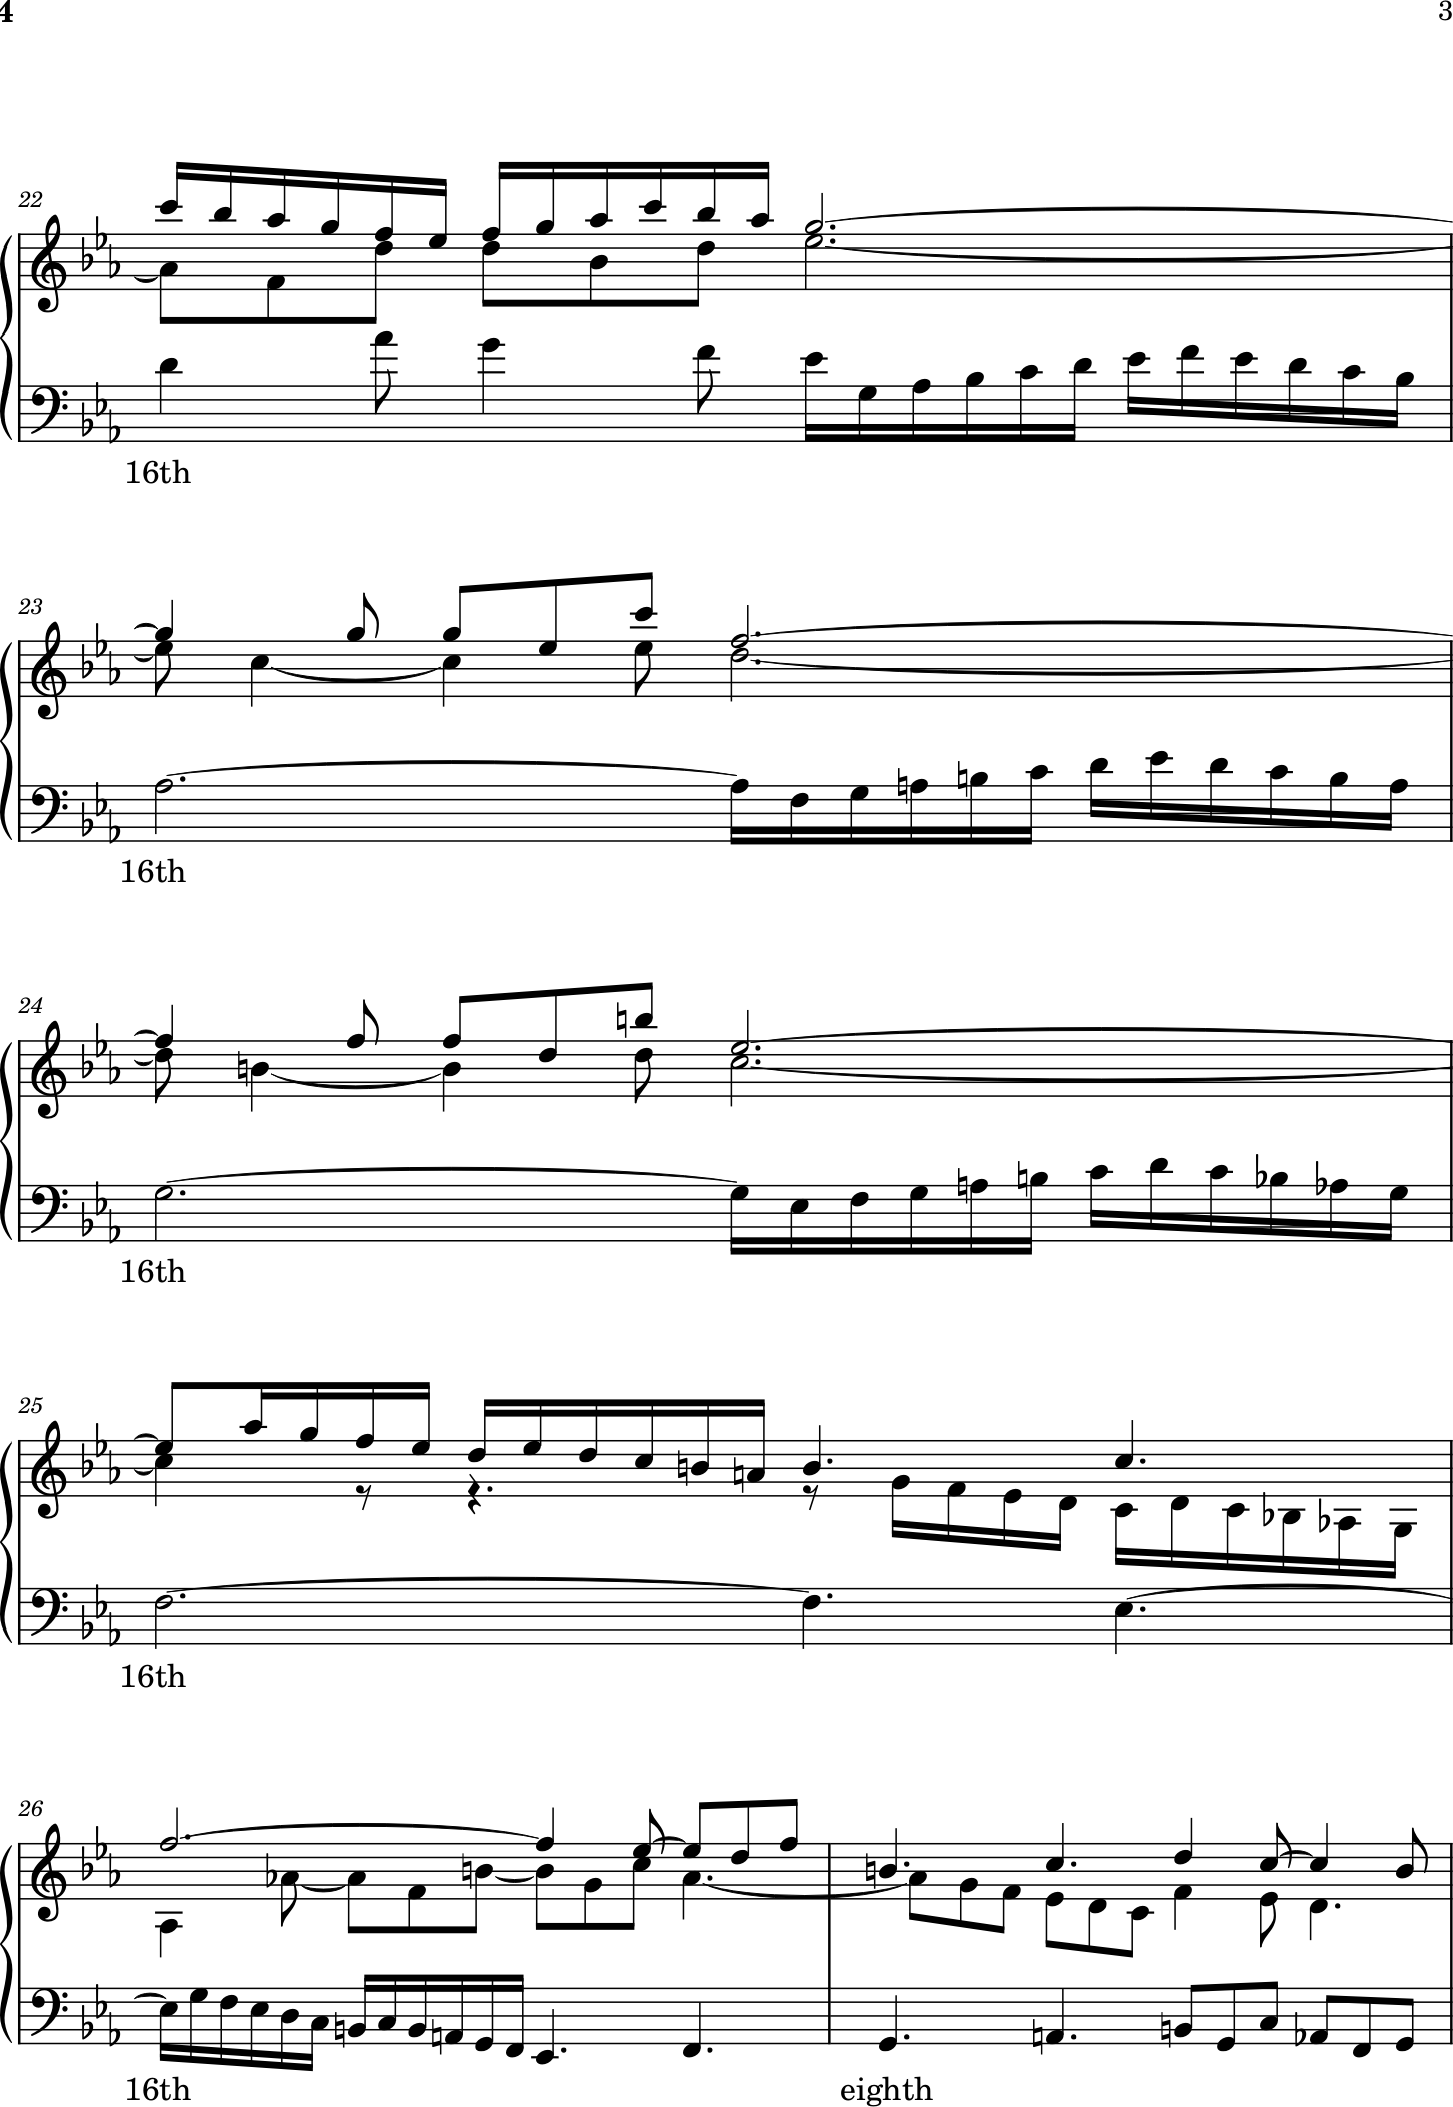

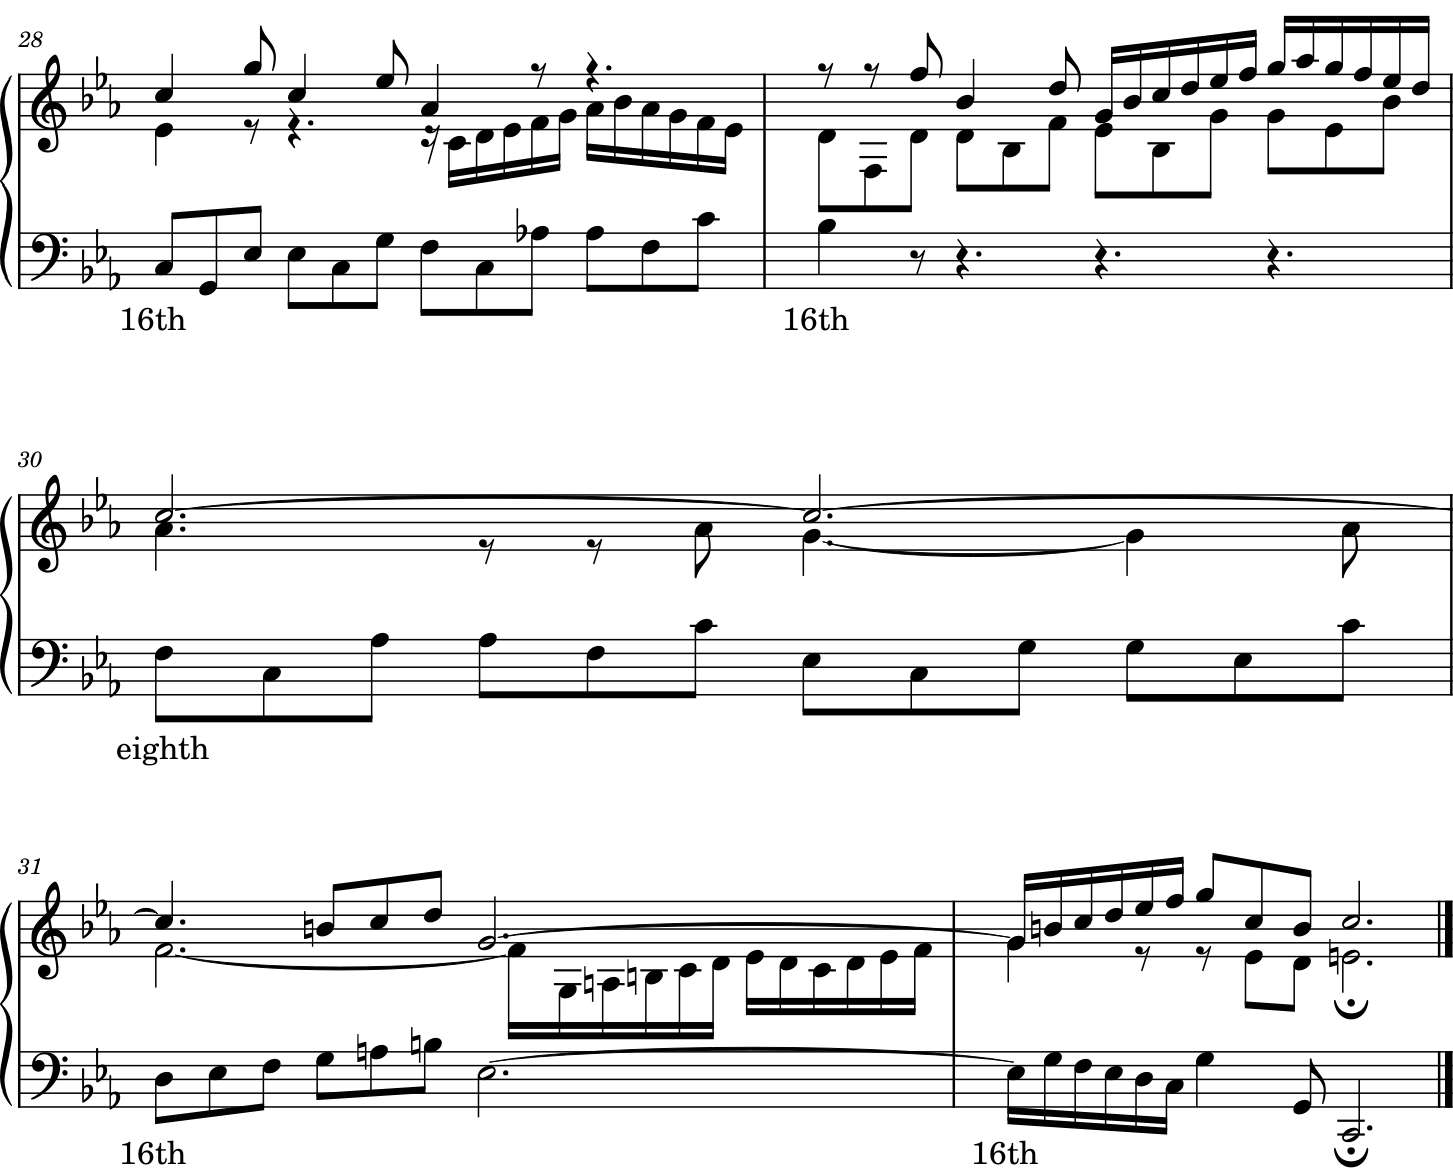

In [9]:
#test
score_with_rhythmic_patterns = Grundrhythmus_allerStimmen(file_path)
score_with_rhythmic_patterns.show()

In [10]:
from music21 import duration

def GrundrhythmusallerStimmen_dict(score):
    """
    in Form von dict. der gemeinsame Grundrhythmus jedes Takts zurückgegeben.
    Rückgabewert:
    dict: {Taktnummer: Rhythmustyp}
    """

    chordified_score = score.chordify()
    rhythmic_patterns = {}

    for measure in chordified_score.getElementsByClass(stream.Measure):
        measure_number = measure.measureNumber
        note_durations = {}


        for element in measure.notesAndRests:
            dur_type = element.duration.type
            if dur_type not in note_durations:
                note_durations[dur_type] = 0
            note_durations[dur_type] += 1


        if note_durations:

            most_common_durations = [
                k for k, v in note_durations.items() if v == max(note_durations.values())
            ]


            most_common_duration = max(
                most_common_durations,
                key=lambda d: duration.Duration(type=d).quarterLength
            )
        else:

            most_common_duration = "unknown"

        rhythmic_patterns[measure_number] = most_common_duration
        
    return rhythmic_patterns

In [11]:
import numpy as np

def Bestimme_betontePosition(score):
    """
    Diese Funktion kann basierend auf den verschiedenen Taktarten und Grundrhytmus-Musteren die betonten Positionen jedes Takts bestimmen.
    Rückgabewert: dict: Die betonten Positionen jedes Takts im Format {Taktnummer: [Offsets]}."
    """

    part1 = score.parts[1]  
    taktart = Taktart_Analyse(score)
    grundrhythmus = GrundrhythmusallerStimmen_dict(score)

    betontePositionen = {}

    # Überprüfung des Durchlaufs des jeden Takts in Parts[1]
    for measure in part1.getElementsByClass(stream.Measure):
        measure_number = measure.measureNumber
        rhythm_type = grundrhythmus.get(measure_number, None)
        print(f"Takt {measure_number}, Grundrhythmus: {rhythm_type}")
         
        if rhythm_type is None:
            print(f"Takt {measure_number}: nichts")
            continue
        if measure.duration is None:
            print(f"Takt {measure_number}: keine Dauerangabe")
            continue

        # Logik für Zweiertakt
        if taktart == "Zweier-Takt":
            # jede 4tel-Note als betonte Position
            if rhythm_type in ["32th", "16th", "eighth"]:
                strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 1)]
            # jede Halbnote als betonte Position
            elif rhythm_type == "quarter":
                strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 2)]
            # jede Ganznote als betonte Position
            elif rhythm_type in ["half", "whole"]:
                strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 4)]
            # Breve als betonte Position
            else:
                strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 8)]

        # Logik für Dreiertakt
        elif taktart == "Dreier-Takt":
            time_signatures = score.flatten().getElementsByClass(meter.TimeSignature)
            for ts in time_signatures:
                denominator = ts.denominator

                # beim 8tel-Takt (3/8, 6/8, 9/8 usw.)
                if denominator == 8:
                    # jede punktierte 4tel-Note als betonte Position
                    if rhythm_type in ["16th", "eighth", "quarter"]:
                        strong_beats = [offset for offset in np.arange(0, measure.duration.quarterLength, 1.5)]
                    else:
                        strong_beats = []

                # beim 16tel-Takt (12/16, usw.)
                elif denominator == 16:
                    # jede punktierte 8tel-Note als betonte Position
                    strong_beats = [offset for offset in np.arange(0, measure.duration.quarterLength, 0.75)]

                # beim 4tel-Takt (3/4, 6/4, usw.)
                elif denominator == 4:
                    # jede 4tel-Note als betonte Position
                    if rhythm_type in ["16th", "eighth"]:
                        strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 1)]
                    # jede punktierte Halbnote als betonte Position
                    elif rhythm_type in ["quarter", "half"]:
                        strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 3)]
                    else:
                        strong_beats = []

                # beim 2tel-Takt (3/2, usw.)
                elif denominator == 2:
                    # jede Halbnote als betonte Position
                    if rhythm_type in ["eighth", "quarter"]:
                        strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 2)]
                    # jede punktierte Ganznote als betonte Position
                    elif rhythm_type in ["half", "whole"]:
                        strong_beats = [offset for offset in range(0, int(measure.duration.quarterLength), 6)]
                    else:
                        strong_beats = []

                else:
                    strong_beats = []

        else:
            strong_beats = []

        betontePositionen[measure_number] = [float(offset) for offset in strong_beats]

    return betontePositionen

In [12]:
betontPositionen = Bestimme_betontePosition(score)
for measure, positions in betontPositionen.items():
    print(f"Takt {measure}, betonte Position:{positions}")

Takt 1, Grundrhythmus: eighth
Takt 2, Grundrhythmus: eighth
Takt 3, Grundrhythmus: eighth
Takt 4, Grundrhythmus: eighth
Takt 5, Grundrhythmus: 16th
Takt 6, Grundrhythmus: 16th
Takt 7, Grundrhythmus: eighth
Takt 8, Grundrhythmus: 16th
Takt 9, Grundrhythmus: 16th
Takt 10, Grundrhythmus: eighth
Takt 11, Grundrhythmus: eighth
Takt 12, Grundrhythmus: eighth
Takt 13, Grundrhythmus: eighth
Takt 14, Grundrhythmus: 16th
Takt 15, Grundrhythmus: 16th
Takt 16, Grundrhythmus: eighth
Takt 17, Grundrhythmus: 16th
Takt 18, Grundrhythmus: 16th
Takt 19, Grundrhythmus: 16th
Takt 20, Grundrhythmus: 16th
Takt 21, Grundrhythmus: 16th
Takt 22, Grundrhythmus: 16th
Takt 23, Grundrhythmus: 16th
Takt 24, Grundrhythmus: 16th
Takt 25, Grundrhythmus: 16th
Takt 26, Grundrhythmus: 16th
Takt 27, Grundrhythmus: eighth
Takt 28, Grundrhythmus: 16th
Takt 29, Grundrhythmus: 16th
Takt 30, Grundrhythmus: eighth
Takt 31, Grundrhythmus: 16th
Takt 32, Grundrhythmus: 16th
Takt 1, betonte Position:[0.0, 1.5, 3.0, 4.5]
Takt 2, bet